In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt


In [2]:
csv_files_shingo = [
            '2023-10-17_DR/NNVT_CH0_PN2304-1470_900v_CH1_PN2305-1100_900v_dr.csv',
            '2023-10-17_DR/NNVT_CH0_PN2304-1470_1000v_CH1_PN2305-1100_1000v_dr.csv',
            '2023-10-17_DR/NNVT_CH0_PN2304-1470_1100v_CH1_PN2305-1100_1100v_dr.csv',
            '2023-10-17_DR/NNVT_CH0_PN2304-1470_1200v_CH1_PN2305-1100_1200v_dr.csv',
            '2023-10-17_DR/NNVT_CH0_PN2304-1470_1300v_CH1_PN2305-1100_1300v_dr.csv'
            ]
csv_files_alex = [
            'csv_from_alex/dr/202308221609_900v_dr.csv',
            'csv_from_alex/dr/202308221609_1000v_dr.csv',
            'csv_from_alex/dr/202308221609_1100v_dr.csv',
            'csv_from_alex/dr/202308221609_1200v_dr.csv',
            'csv_from_alex/dr/202308221609_1300v_dr.csv'
            ]
channel_labels = ['PN2304-1470', 'PN2305-1100', 'KM6206', 'PN2209-4017', 'PN2209-4010']
HVs = [900, 1000, 1100, 1200, 1300]

fontsize = 15

## Dark rate vs Threshold ##

/tmp/ipykernel_1105/1052249769.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DR_HV_tmp['HV']=HVs[i]
/tmp/ipykernel_1105/1052249769.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DR_HV_tmp['HV']=HVs[i]
/tmp/ipykernel_1105/1052249769.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

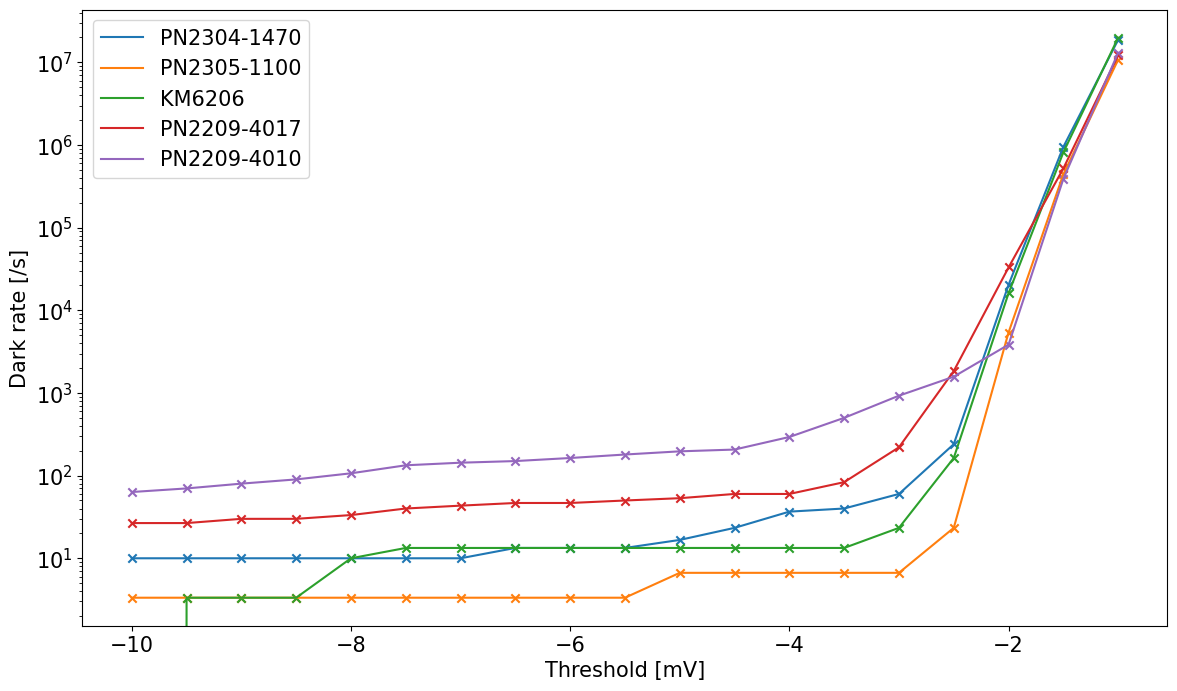

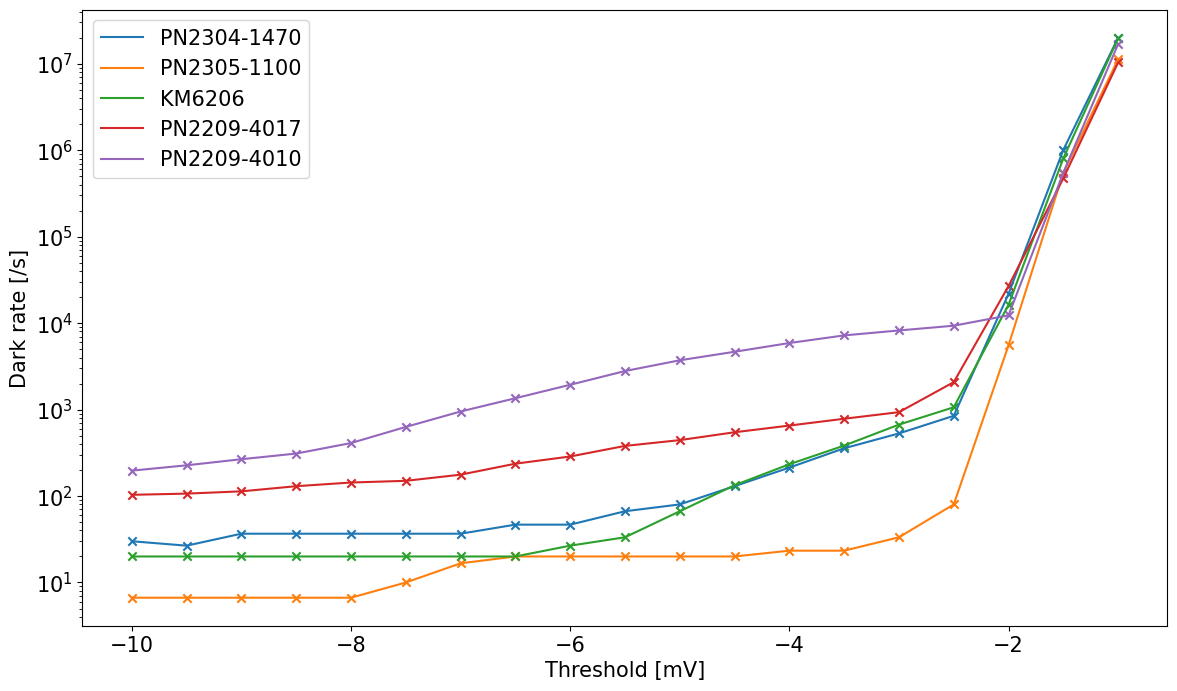

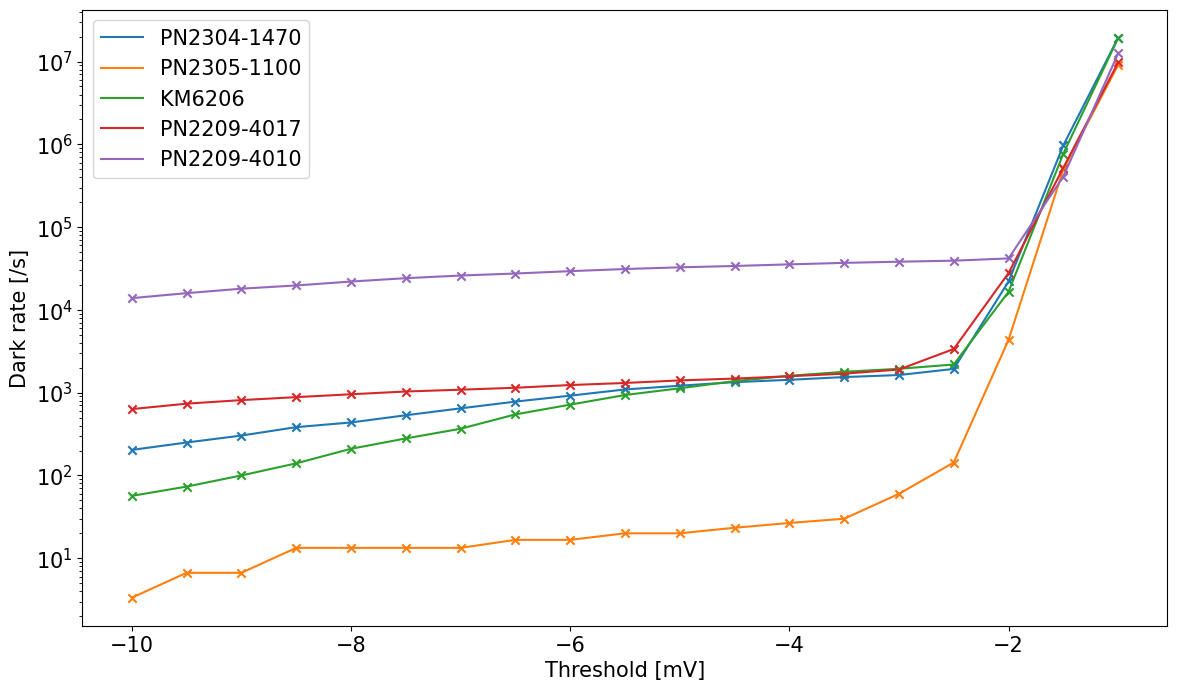

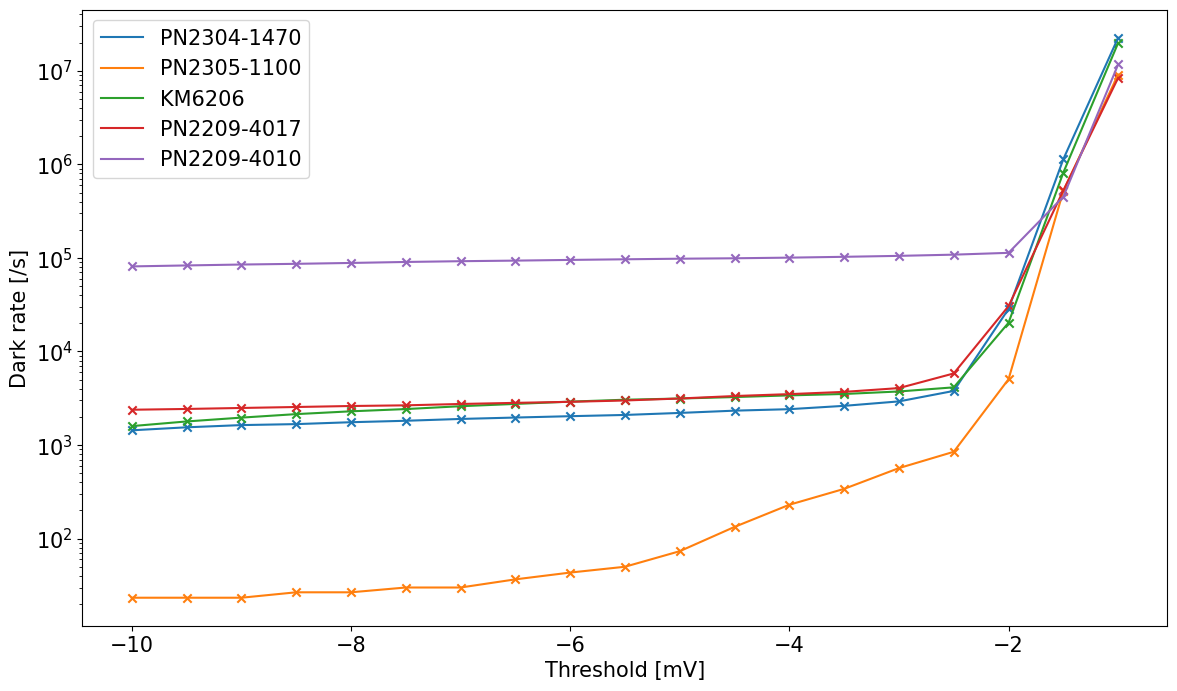

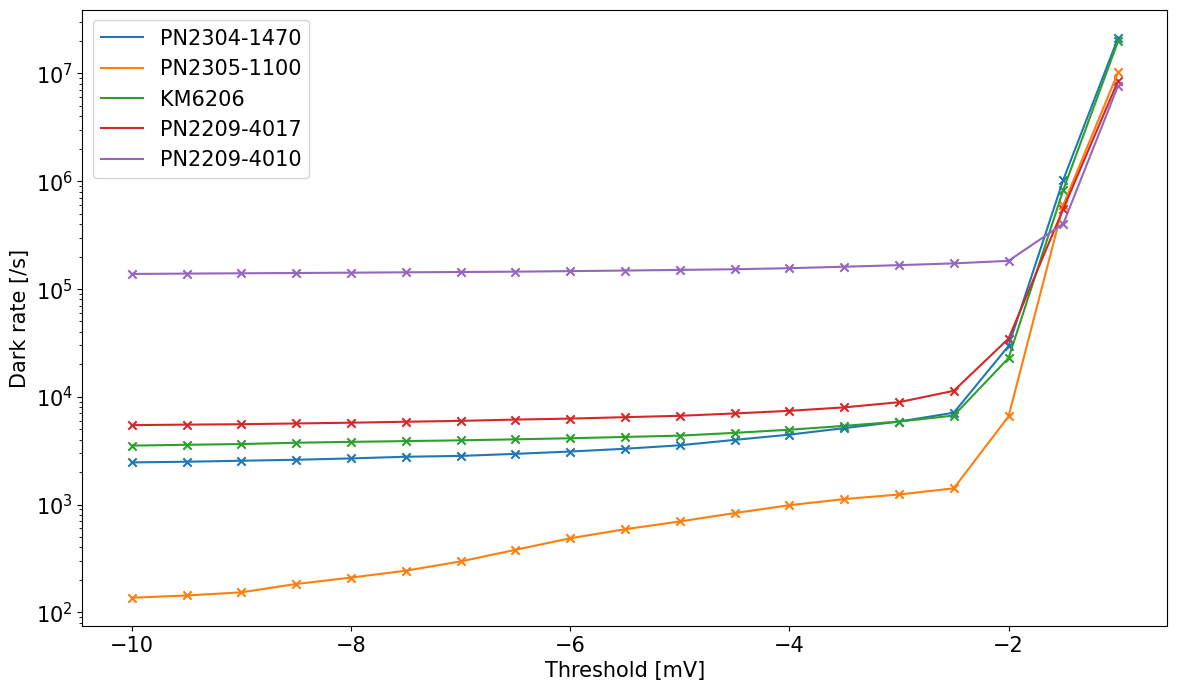

In [3]:
date_time_now = dt.now().strftime('%Y%m%d%H%M%S')

df_DR_HV = pd.DataFrame()

for i in range(len(csv_files_shingo)):
    dr_fig, dr_ax = plt.subplots()
    df_shingo = pd.read_csv(csv_files_shingo[i])
    df_alex = pd.read_csv(csv_files_alex[i])
    df_comb = pd.concat([df_shingo, df_alex], axis=1)
    
    
    cols = df_comb.columns.to_list()
    for col in cols:
        if '_passes' in col:
            df_comb.drop([col], axis=1, inplace=True)  
    df_comb = df_comb.loc[:,~df_comb.columns.duplicated()]
    new_cols = ['threshold']+channel_labels
    df_comb.columns = new_cols
    df_comb.set_index('threshold', inplace=True)
    
    ### DR vs HV ##
    df_DR_HV_tmp = df_comb[df_comb.index.values == -8.]
    df_DR_HV_tmp['HV']=HVs[i]
    df_DR_HV = pd.concat([df_DR_HV, df_DR_HV_tmp], axis=0)
    
    for col in new_cols[1:]:          
        dr_ax.plot(df_comb.index, df_comb[col], label=col)
        dr_ax.scatter(df_comb.index, df_comb[col], marker='x')
    
    dr_fig.set_size_inches(14,8)
    dr_ax.legend(fontsize=fontsize)
    dr_ax.set_ylabel('Dark rate [/s]', fontsize=fontsize)
    dr_ax.set_xlabel('Threshold [mV]', fontsize=fontsize)
    dr_ax.set_yscale('log')
    dr_ax.tick_params(labelsize=fontsize)
    
    save_file_name = './'+date_time_now+'_'+str(HVs[i])+'V'+'.pdf'
    dr_fig.savefig(save_file_name, dpi=300)

## Dark rate vs Supply voltage

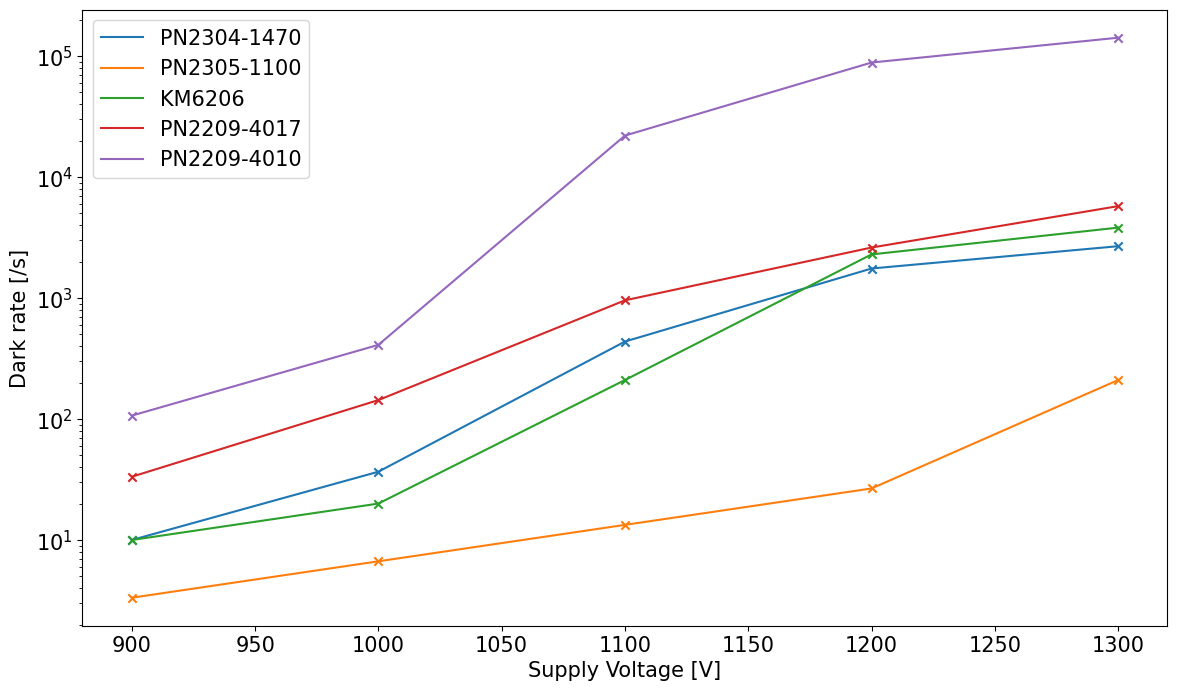

In [4]:
df_DR_HV.set_index('HV', inplace=True)

dr_fig, dr_ax = plt.subplots()
dr_fig.set_size_inches(14,8)

for col in new_cols[1:]:      
    dr_ax.plot(df_DR_HV.index, df_DR_HV[col], label=col)
    dr_ax.scatter(df_DR_HV.index, df_DR_HV[col], marker='x')

    dr_ax.legend(fontsize=fontsize)
    dr_ax.set_ylabel('Dark rate [/s]', fontsize=fontsize)
    dr_ax.set_xlabel('Supply Voltage [V]', fontsize=fontsize)
    dr_ax.set_yscale('log')
    dr_ax.tick_params(labelsize=fontsize)

save_file_name = './'+date_time_now+'_DR_HV.pdf'
dr_fig.savefig(save_file_name, dpi=300)